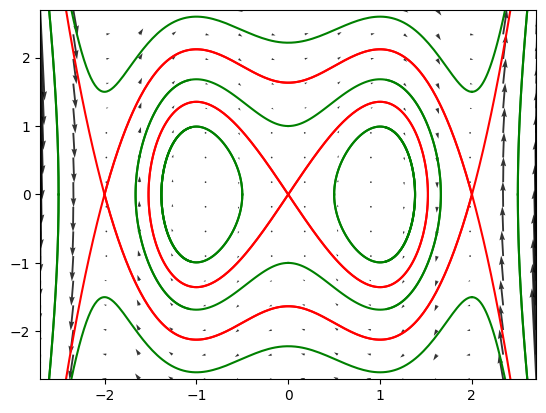

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def eq_quiver(rhs, limits, N=16):
    xlims, ylims = limits
    xs = np.linspace(xlims[0], xlims[1], N)
    ys = np.linspace(ylims[0], ylims[1], N)
    U = np.zeros((N, N))
    V = np.zeros((N, N))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            vfield = rhs(0.0, [x, y])
            u, v = vfield
            U[i][j] = u
            V[i][j] = v
    return xs, ys, U, V


def func():
    def rhs(t, X):
        x, y = X
        return (y, x ** 5 - 5.0 * x ** 3 + 4.0 * x)

    return rhs


def matrix(x):
    px = 0.0  # 
    py = 1.0
    qx = 5.0 * x ** 4 - 15.0 * x ** 2 + 4.0
    qy = 0.0
    return [[px, py], [qx, qy]]


def plotonPlane(rhs, limits, time_lims, points, colors):
    plt.close()
    xlims, ylims = limits
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])
    xs, ys, U, V = eq_quiver(rhs, limits)
    plt.quiver(xs, ys, U, V, alpha=0.8)

    eps = 0.001

    for time, point, color in zip(time_lims, points, colors):
        eigen = np.linalg.eig(matrix(point[0]))
        #print(eigen)
        
        reverse_time = [time[1], time[0]]
        offset = eps * eigen[1][1][0] if (color == 'r-') else 0
        
        sol = solve_ivp(rhs, time, 
                        [point[0] + offset, point[1] + offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, reverse_time, 
                        [point[0] + offset, -point[1] - offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, time, 
                        [point[0] - offset, -point[1] - offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, reverse_time, 
                        [point[0] - offset, point[1] + offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
    

pnts = [[0., 0.], [2., 0.], [-2., 0.], [-2.5, 0.], [2.5, 0.], [-0.5, 0.], [0.5, 0.], [2., 1.5], [0., 1.]]

tms = [[-4., 4.]] + [[-2., 2.]] * 2 + [[-1., 1.]] * 6

clrs = ['r-'] * 3 + ['g-'] * 6
    
# sep:
#plotonPlane(func(), [( -2.0025, -1.9975), (-0.0027, 0.0027)], tms, pnts, clrs) 
#plotonPlane(func(), [( 1.9975, 2.0025), (-0.0027, 0.0027)], tms, pnts, clrs)
#plotonPlane(func(), [( -0.0027, 0.0027), (-0.0027, 0.0027)], tms, pnts, clrs)
#

#plotonPlane(func(), [( -2.0025, -1.9975), (1.4975, 1.5025)], tms, pnts, clrs)
#plotonPlane(func(), [( 1.9975, 2.0025), (1.4975, 1.5025)], tms, pnts, clrs)

#plotonPlane(func(), [( -0.004, 0.004), (1-0.0027, 1+0.0027)], tms, pnts, clrs)

#plotonPlane(func(), [( -2.0025-0.5, -1.9975-0.5), (-0.0027, 0.0027)], tms, pnts, clrs)
#plotonPlane(func(), [( 1.9975+0.5, 2.0025+0.5), (-0.0027, 0.0027)], tms, pnts, clrs)

plotonPlane(func(), [( -2.7, 2.7), (-2.7, 2.7)], tms, pnts, clrs)





In [272]:
def plot_by_time(rhs, limits, time, point, offset):
    plt.close()
    xlims, ylims = limits
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])
    
    #print(eigen)
    sol = solve_ivp(rhs, time, [point[0] + offset, point[1] + offset], 
                    method='RK45', rtol=1e-12, atol=1e-10)
    
    x = sol.y[0]
    t = sol.t
    plt.plot(t, x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.grid(True)


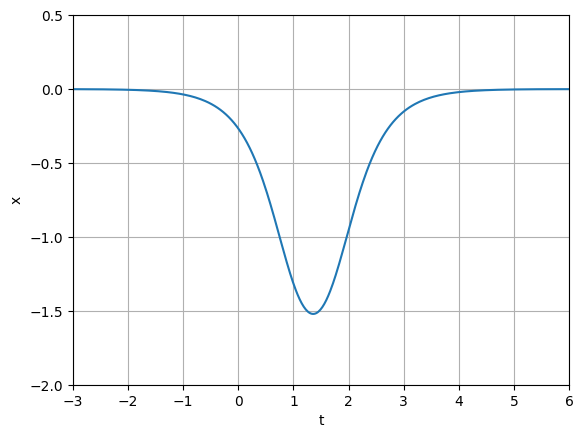

In [433]:
eps = 0.001
eigen = np.linalg.eig(matrix(0.))
plot_by_time(func(), [(-3., 6.), ( -2., 0.5)], [-3. , 6.], [0., 0.], -eps * eigen[1][1][0])

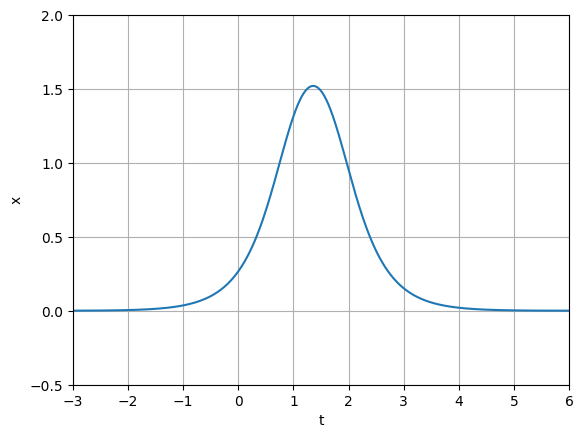

In [434]:
eigen = np.linalg.eig(matrix(0.))
plot_by_time(func(), [(-3., 6.), ( -0.5, 2)], [-3. , 6.], [0., 0.], eps * eigen[1][1][0])

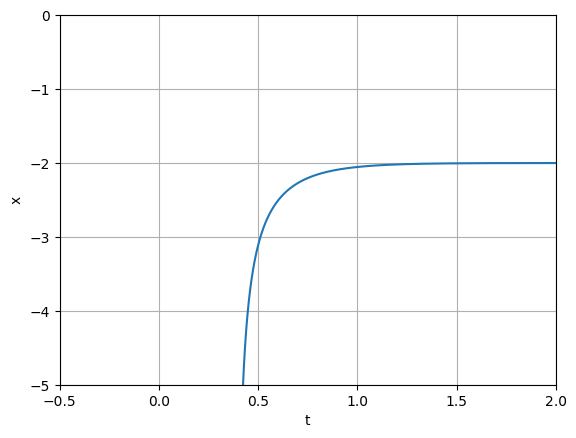

In [282]:
eigen = np.linalg.eig(matrix(-2.))
plot_by_time(func(), [(-0.5, 2.), ( -5., 0)], [2. , -0.5], [-2., 0.], -eps * eigen[1][1][0])

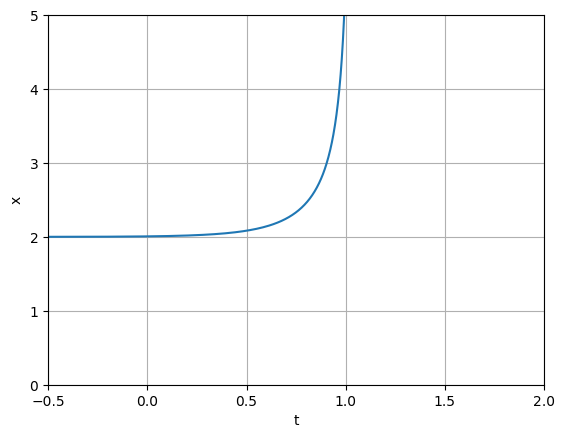

In [283]:
eigen = np.linalg.eig(matrix(2.))
plot_by_time(func(), [(-0.5, 2.), ( 0., 5)], [-0.5 , 2.], [2., 0.], eps * eigen[1][1][0])

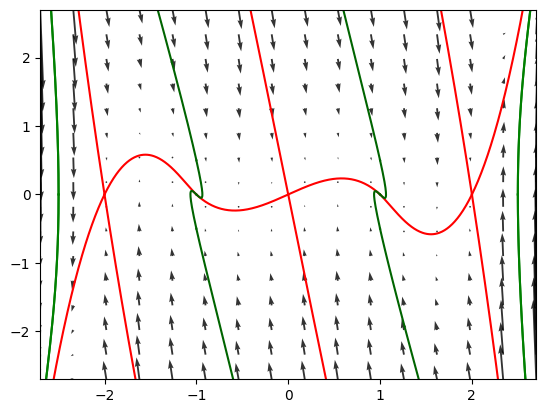

In [269]:
def func_dis(a):
    def rhs(t, X):
        x, y = X
        return (y, x ** 5 - 5.0 * x ** 3 + 4.0 * x - a * y)

    return rhs


def matrix_dis(x, a):
    px = 0.0  # 
    py = 1.0
    qx = 5.0 * x ** 4 - 15.0 * x ** 2 + 4.0
    qy = -a
    return [[px, py], [qx, qy]]


def plotonPlane_dis(a, rhs, limits, time_lims, points, colors):
    plt.close()
    xlims, ylims = limits
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])
    xs, ys, U, V = eq_quiver(rhs, limits)
    plt.quiver(xs, ys, U, V, alpha=0.8)

    eps = 0.001

    for time, point, color in zip(time_lims, points, colors):
        eigen = np.linalg.eig(matrix_dis(point[0], a))
        #print(eigen)
        
        reverse_time = [time[1], time[0]]
        offset = eps * eigen[1][0][1] if (color == 'r-' or color == '#006400') else 0
        
        sol = solve_ivp(rhs, time, 
                        [point[0] + offset, point[1] + 0.6 * offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, reverse_time, 
                        [point[0] + offset, -point[1] - offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, time, 
                        [point[0] - offset, -point[1] - 0.6 * offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)
        sol = solve_ivp(rhs, reverse_time, 
                        [point[0] - offset, point[1] + offset], 
                        method='RK45', rtol=1e-12, atol=1e-10)
        x, y = sol.y
        plt.plot(x, y, color)

pnts_d = [[0., 0.], [2., 0.], [-2., 0.], [-1., 0.5], [1., 0.5], [-2.5, 0.], [2.5, 0.]] #, [0.5, 1.5]

tms_d = [[-9, 14.]] * 3 + [[-3., 3.]] * 4

clrs_d = ['r-'] * 3 + ['#006400'] * 2 + ['g-'] * 2

# sep:
#plotonPlane_dis(6., func_dis(6.), [( -2.0027, -1.9973), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(6., func_dis(6.), [( 1.9973, 2.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(6., func_dis(6.), [( -1.00025, -0.99975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(6., func_dis(6.), [( 0.99975, 1.00025), (-0.00027, 0.00027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(6., func_dis(6.), [( -0.0027, 0.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#

plotonPlane_dis(6., func_dis(6.), [( -2.7, 2.7), (-2.7, 2.7)], tms_d, pnts_d, clrs_d)

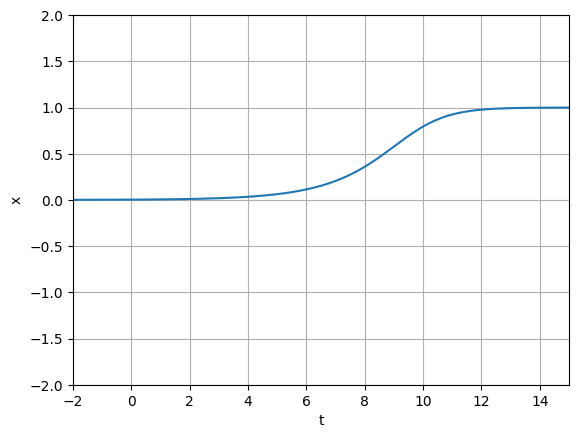

In [384]:
eps = 0.001
eigen = np.linalg.eig(matrix_dis(0., 6.))
plot_by_time(func_dis(6.), [(-2., 15.), ( -2., 2.)], [-2. , 15.], [0., 0.], eps * eigen[1][0][0])

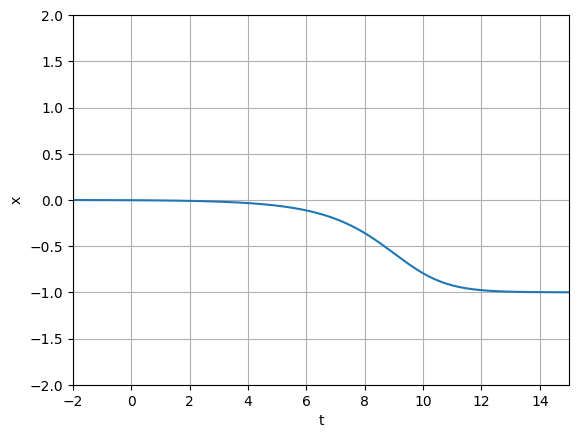

In [385]:
eps = 0.001
a = 6.
eigen = np.linalg.eig(matrix_dis(0., a))
plot_by_time(func_dis(a), [(-2., 15.), ( -2, 2)], [-2. , 15.], [0., 0.], -eps * eigen[1][0][0])

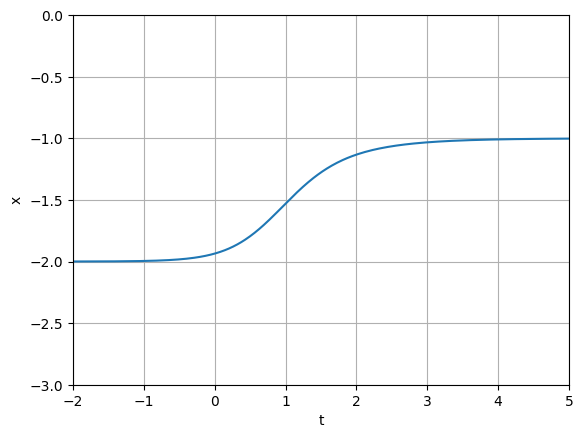

In [372]:
a = 6.
eigen = np.linalg.eig(matrix_dis(-2., a))
plot_by_time(func_dis(a), [(-2., 5.), ( -3., 0)], [-2., 5.], [-2., 0.], eps * eigen[1][0][0])

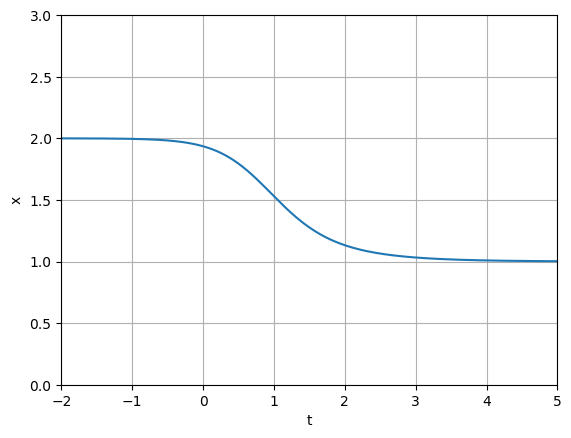

In [377]:
a = 6.
eigen = np.linalg.eig(matrix_dis(2., a))
plot_by_time(func_dis(a), [(-2, 5.), ( 0., 3)], [-2. , 5], [2., 0.], -eps * eigen[1][0][0])

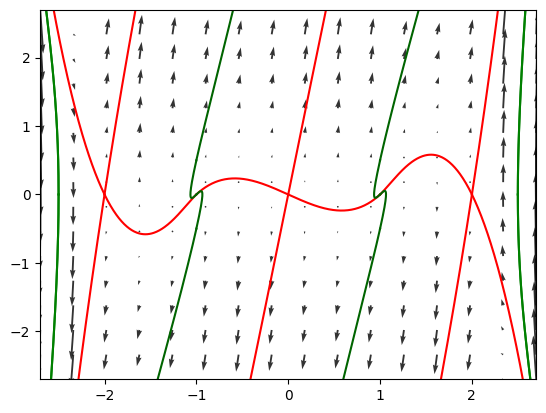

In [264]:
pnts_d = [[0., 0.], [2., 0.], [-2., 0.], [-1., 0.5], [1., 0.5], [-2.5, 0.], [2.5, 0.]] #, [0.5, 1.5]

tms_d = [[-9, 14.]] * 3 + [[-3., 3.]] * 4

clrs_d = ['r-'] * 3 + ['#006400'] * 2 + ['g-'] * 2

# sep:
#plotonPlane_dis(-6., func_dis(-6.), [( -2.0027, -1.9973), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-6., func_dis(-6.), [( 1.9973, 2.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-6., func_dis(-6.), [( -1.00025, -0.99975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-6., func_dis(-6.), [( 0.99975, 1.00025), (-0.00027, 0.00027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-6., func_dis(-6.), [( -0.0027, 0.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#

plotonPlane_dis(-6., func_dis(-6.), [( -2.7, 2.7), (-2.7, 2.7)], tms_d, pnts_d, clrs_d)

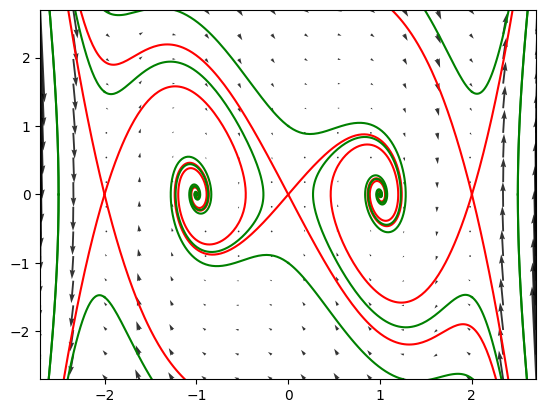

In [267]:
pnts_d = [[0., 0.], [2., 0.], [-2., 0.], [-2.5, 0.], [2.5, 0.], [2., 1.5], [-2., 1.5], [0., 1.]]

#tms_d = [[-4., 4.]] + [[-2., 2.]] * 2 + [[-1., 1.]] * 6
tms_d = [[-9., 9.]] * 8

clrs_d = ['r-'] * 3 + ['g-'] * 5

a = 1.
# sep:
#plotonPlane_dis(a, func_dis(a), [( -2.0025, -1.9975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(a, func_dis(a), [( 1.9975, 2.0025), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(a, func_dis(a), [( -1.0025, -0.9975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(a, func_dis(a), [( 0.9975, 1.0025), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(a, func_dis(a), [( -0.0027, 0.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#

plotonPlane_dis(a, func_dis(a), [( -2.7, 2.7), (-2.7, 2.7)], tms_d, pnts_d, clrs_d)

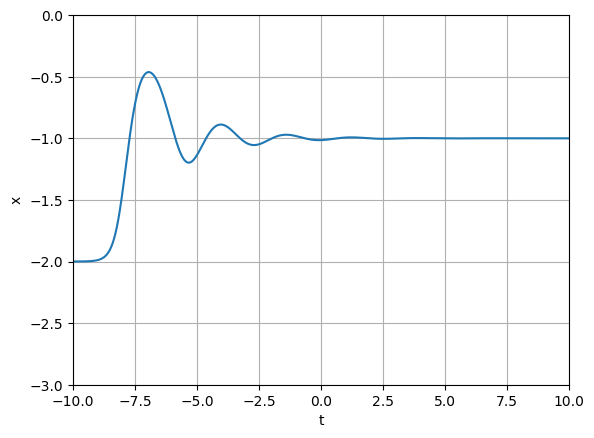

In [345]:
a = 1.
eigen = np.linalg.eig(matrix_dis(-2., a))
plot_by_time(func_dis(a), [(-10., 10.), ( -3, 0)], [-10. , 10.], [-2., 0.], eps * eigen[1][0][0])

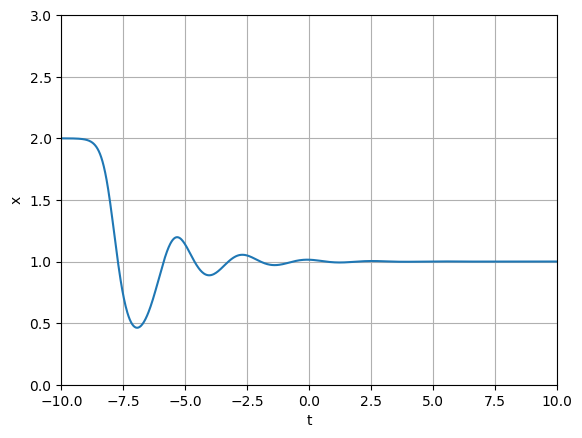

In [348]:
a = 1.
eigen = np.linalg.eig(matrix_dis(2., a))
plot_by_time(func_dis(a), [(-10., 10.), ( 0., 3.)], [-10. , 10.], [2., 0.], -eps * eigen[1][0][0])

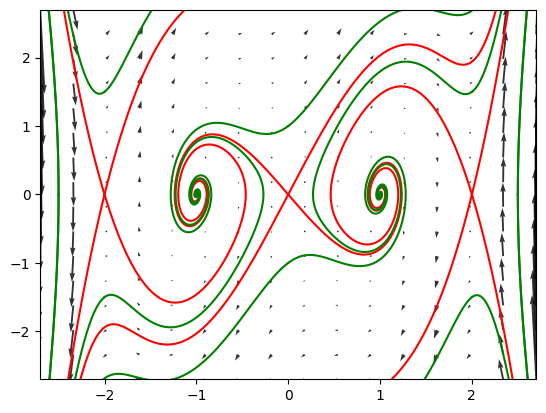

In [349]:
pnts_d = [[0., 0.], [2., 0.], [-2., 0.], [-2.5, 0.], [2.5, 0.], [2., 1.5], [-2., 1.5], [0., 1.]]

#tms_d = [[-4., 4.]] + [[-2., 2.]] * 2 + [[-1., 1.]] * 6
tms_d = [[-9., 9.]] * 8

clrs_d = ['r-'] * 3 + ['g-'] * 5

# sep:
#plotonPlane_dis(-1., func_dis(-1), [( -2.0025, -1.9975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-1., func_dis(-1.), [( 1.9975, 2.0025), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-1., func_dis(-1), [( -1.0025, -0.9975), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-1., func_dis(-1.), [( 0.9975, 1.0025), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#plotonPlane_dis(-1., func_dis(-1), [( -0.0027, 0.0027), (-0.0027, 0.0027)], tms_d, pnts_d, clrs_d)
#

plotonPlane_dis(-1., func_dis(-1.), [( -2.7, 2.7), (-2.7, 2.7)], tms_d, pnts_d, clrs_d)

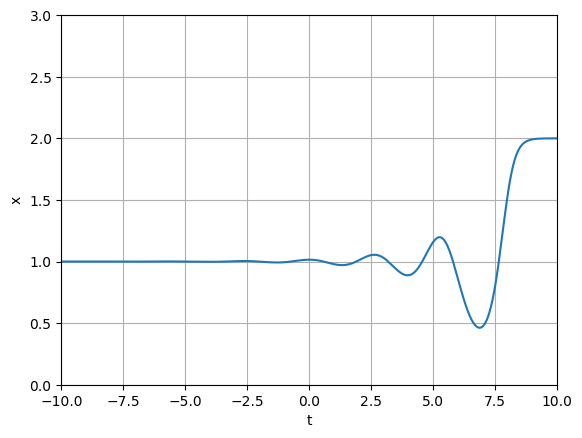

In [359]:
a = -1.
eigen = np.linalg.eig(matrix_dis(2., a))
plot_by_time(func_dis(a), [(-10., 10.), ( 0., 3.)], [10. , -10.], [2., 0.], eps * eigen[1][0][0])

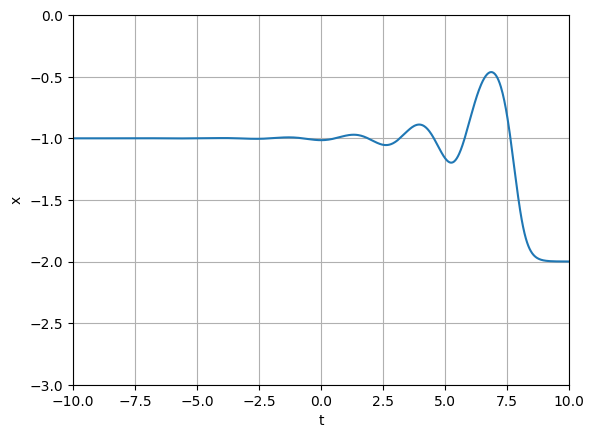

In [360]:
a = -1.
eigen = np.linalg.eig(matrix_dis(-2., a))
plot_by_time(func_dis(a), [(-10., 10.), ( -3., 0.)], [10. , -10.], [-2., 0.], -eps * eigen[1][0][0])